## Social Network Analysis

#### Objectives
1. Visualize a social network
2. Conduct basic network analysis
3. Enhance the visualization of your network

## Social Network Analysis (SNA)
SNA is a method by which one can analyze the connections across individuals or groups or institutions. It allows us to examine how entities are interrelated. In this ICE, we will look at a few important steps of SNA.

First, let's revisit a couple of important concepts
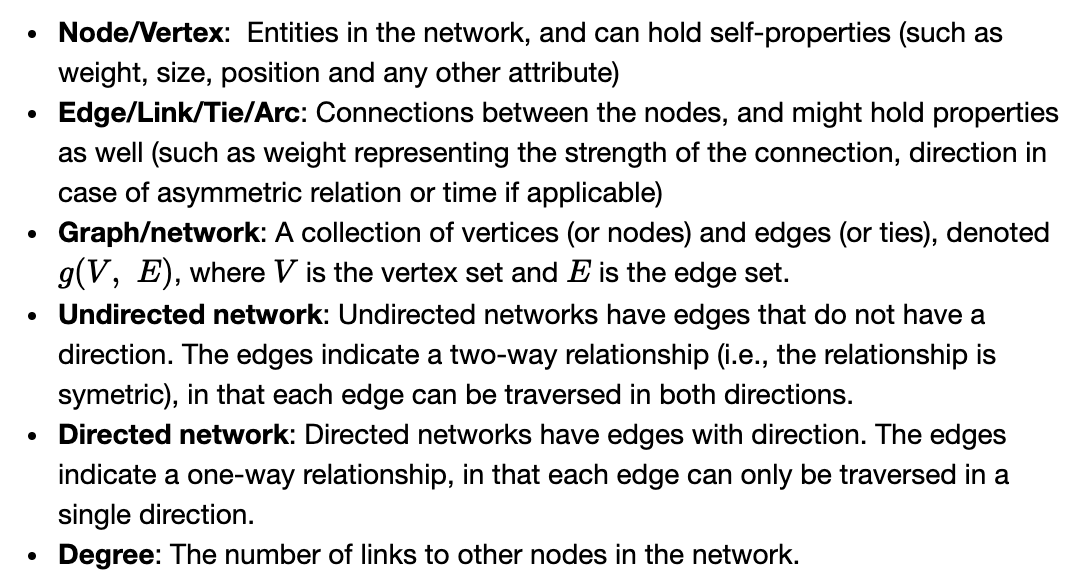

For example, the network below is a directed network with six nodes and six edges. Node B has *one* out-degree (i.e. to C) and *two* in-degree (i.e. from A & D).

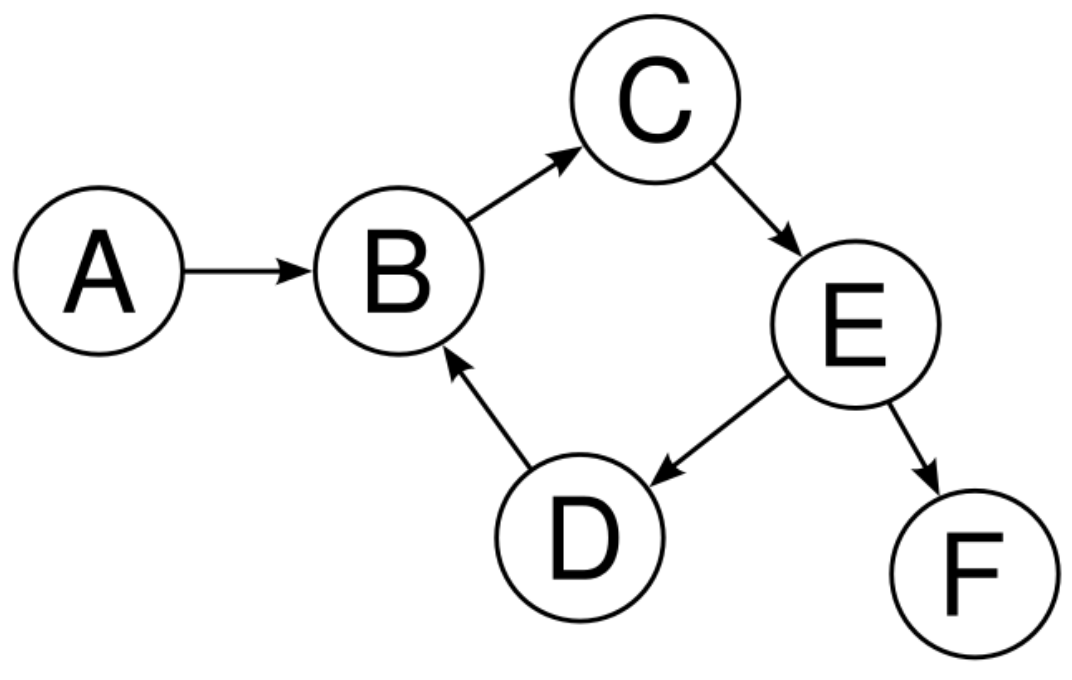

## SNA Data Preparation
There are three ways to store SNA data: 
1. node and edge list
    - Most widely used way of storing SNA data. You'll have a list of nodes and a list of edge pairs. You may not need the node list if you don't have "orphan" nodes (the nodes aren't connected to any others)
2. adjacency matrix
    - Also very common. Instead fo two tables, you just need one big matrix.
3. adjacency list (see figure below)
    - Easy to interpret for human eyes but less used bc it's "untidy"

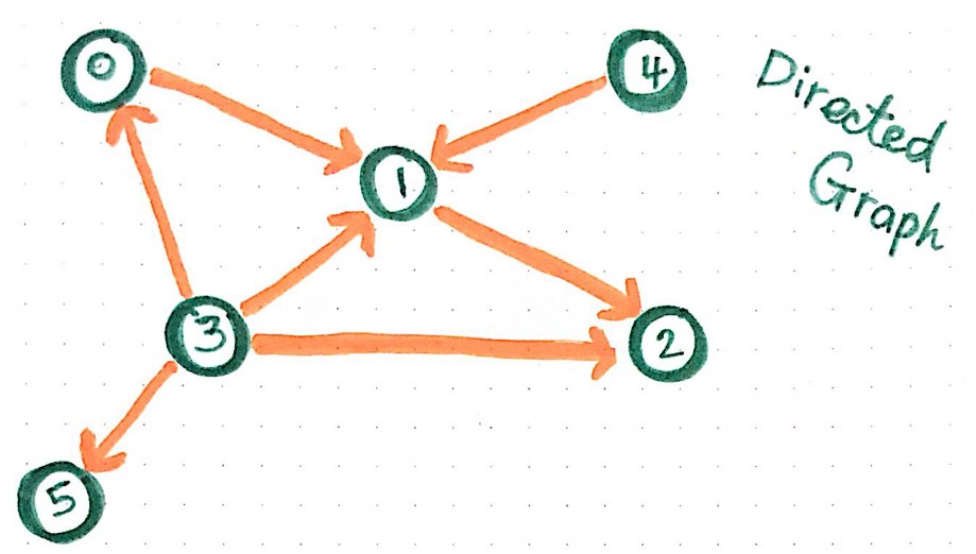
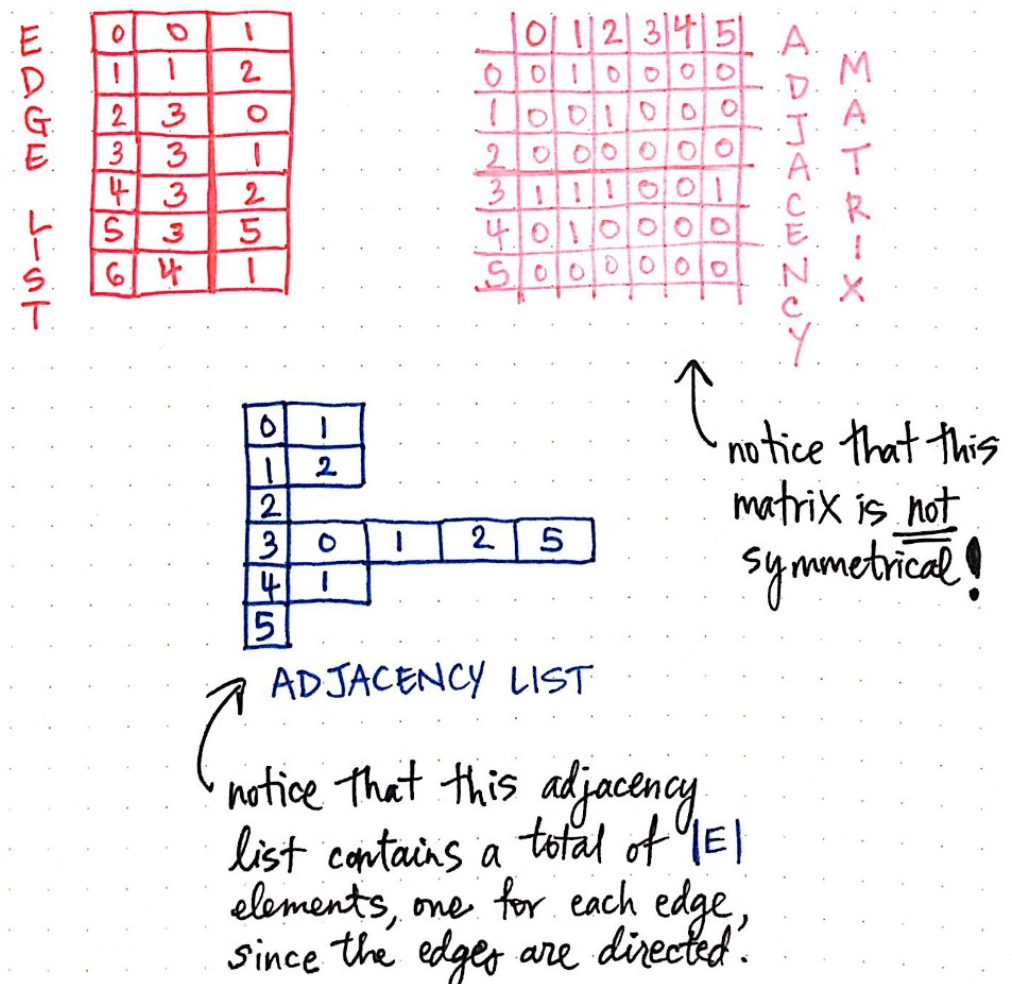

## Visualizing 4050 with Python
19 people reported their course registration so now we can see how this class is connected.

We're going to use <mark>networkx</mark> module for the SNA. Let's start with the basic importing

In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Visualizing the network
The data we are going to use is <mark>peopleSNAno4050.csv</mark>. HUDK4050 is removed from everyone's list since everyone's obivously taking it and would make the network too well-connected. 

Note here, the regular <mark>read_csv</mark> is using a new parameter called <mark>index_col = 0</mark> bc we need the first column to be row names. This is an adjacency matrix for undirected graph, so we're calling <mark>Graph()</mark> to create the social network. Depending on the graph type and how the data is stored, you'll need different functions in <mark>networkx</mark>.

In [3]:
SNAdata = pd.read_csv("ICE8_Data.csv", index_col = 0)
G = nx.Graph(SNAdata)

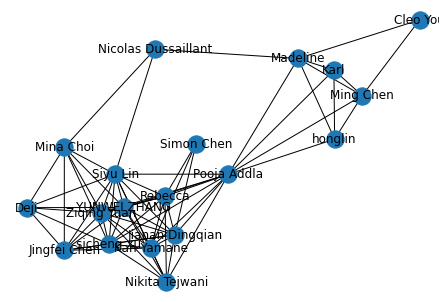

In [4]:
## Plotting the network is easy. We'll worry about the visualization later
nx.draw(G, with_labels = True)

## was getting an error for a long time and trying different versions of nx.draw() didn't help.
## Solution: ran the below command in terminal, rebooted this file and draw now works
    ## pip install decorator==5.0.9

### Network Statistics
#### Density
The first statistic we'll look at is density. This is a measure of how complete the graph is (i.e. how many edges are present in the network as compared to the total possible number of edges)

In [5]:
density = nx.density(G)

## This format is for the output decimal places
print('The edge density is: %.3f' % (density))

The edge density is: 0.415


[Tutorial for output formatting](https://www.geeksforgeeks.org/python-output-formatting/)

The value of 0.415 indicates that this network is well-connected bc we can see mroe than 40% links among all possible links. This gets harder as the network size increases.

#### Degree Centrality
Next, let's look at the <mark>**degree**, or how many edges each node has</mark>. This is a common centrality measure, which gives an idea of how 'important' each node is in teh network. The assumption si that nodes with the most edges are the most important/central as they are directly connected to lots of other nodes, thus making them expected to play important role sin netowrk. <mark>networkx</mark> can get the degree centrality very easily. Just call the <mark>degree()</mark> in a <mark>networkx</mark> object, and you'll get a dictionary-like object. 

Python dictionary is a special object we haven't discussed yet, but [here are some basics](https://www.w3schools.com/python/python_dictionaries.asp).

For directed networks, you can calculate the in-degree cenrtality and out-degree centrality respectively with <mark>in_degree_centrality()</mark> and <mark>out_degree_centrality()</mark>.

In [6]:
degree = nx.degree(G)
degree

DegreeView({'Nicolas Dussaillant': 3, 'Ming Chen': 5, 'Rebecca': 9, 'Nikita Tejwani': 8, 'Simon Chen': 3, 'Pooja Addla': 12, 'honglin': 4, 'Karl': 4, 'sicheng xu': 11, 'Jianan Dingqian': 10, 'Siyu Lin': 12, 'Ziqing Yuan': 11, 'Jingfei Chen': 8, 'Mina Choi': 7, 'Cleo You': 2, 'Deji': 6, 'Kan Yamane': 10, 'YUNWEI ZHANG': 11, 'Madeline': 6})

We can easily visualize the dictionary by converting it into a pandas dataframe with <mark>from_dict()</mark>

In [7]:
pd.DataFrame(degree)

,0,1
0,Nicolas Dussaillant,3
1,Ming Chen,5
2,Rebecca,9
3,Nikita Tejwani,8
4,Simon Chen,3
5,Pooja Addla,12
6,honglin,4
7,Karl,4
8,sicheng xu,11
9,Jianan Dingqian,10


#### Closeness centrality
Measures "how quickly" a node can travel to the rest of the graph. 

Closeness_centrality returns a dictionary in a different way compared to degree()

Therefore, we need to specify the orientation, otherwise Python will complain. 

[FMI](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html) & [Discussion](https://stackoverflow.com/questions/17839973/constructing-pandas-dataframe-from-values-in-variables-gives-valueerror-if-usi)

In [8]:
close = nx.closeness_centrality(G)
pd.DataFrame.from_dict(close, orient = 'index')

,0
Nicolas Dussaillant,0.529412
Ming Chen,0.514286
Rebecca,0.642857
Nikita Tejwani,0.620690
Simon Chen,0.428571
Pooja Addla,0.750000
honglin,0.500000
Karl,0.500000
sicheng xu,0.692308
Jianan Dingqian,0.666667


#### Betweenness Centrality
A way of detecting the amount of influence a node has over the flow of information in a graph. It's often used to find nodes tha tserve as a bridge from one part of a graph to another. The algorithm calculates unweighted shortest paths between all pairs of nodes in a graph. We're using <mark>betweenness_centrality()</mark> to calculate this metric.

In [9]:
between = nx.betweenness_centrality(G)
pd.DataFrame.from_dict(between, orient = 'index')

,0
Nicolas Dussaillant,0.028494
Ming Chen,0.043542
Rebecca,0.029879
Nikita Tejwani,0.000000
Simon Chen,0.000000
Pooja Addla,0.363663
honglin,0.000000
Karl,0.000000
sicheng xu,0.037340
Jianan Dingqian,0.042367


#### Community detection
This method is similar to clustering algorithm. In a social network this is the idea that a large network can be broken down into smaller communities/cliques. Ex., if the network represents the social relationships of all teh students at a school, a community/clique would be a friendship group.

There are many ways to approach community detection in networks, but one modularity optimisation method is <mark>greedy modularity maximization</mark>. Modularity is a measure of the extent to which like is connected to like in a network. The algorithm we'll choose is already implemented for us in <mark>networkx</mark>, which makes its implementation very easy.

Below, <mark>greedy_modularity_communities()</mark> runs the Clauset-Newman_Moore greedy modularity maximization. GMM begins with each node in its own community and joins the pair of communities that most increases modularity until no such pair exists. We can put the result into a list and see how many communities we've detected.

In [14]:
from networkx.algorithms.community.modularity_max import greedy_modularity_communities

c = list(greedy_modularity_communities(G))

print(len(c))

## not sure why mine is printing 2 instead of 3, but I can only select 2 communities....

2


In [16]:
## Select each community and print out the members
community_0 = sorted(c[0])
community_1 = sorted(c[1])

print(community_0)
print(community_1)

['Deji', 'Jianan Dingqian', 'Jingfei Chen', 'Kan Yamane', 'Mina Choi', 'Nicolas Dussaillant', 'Nikita Tejwani', 'Rebecca', 'Simon Chen', 'Siyu Lin', 'YUNWEI ZHANG', 'Ziqing Yuan', 'sicheng xu']
['Cleo You', 'Karl', 'Madeline', 'Ming Chen', 'Pooja Addla', 'honglin']


Notes because of the error
(Compared to the instructions, community_1 looks correct, and community_2 is embedded into community_0)
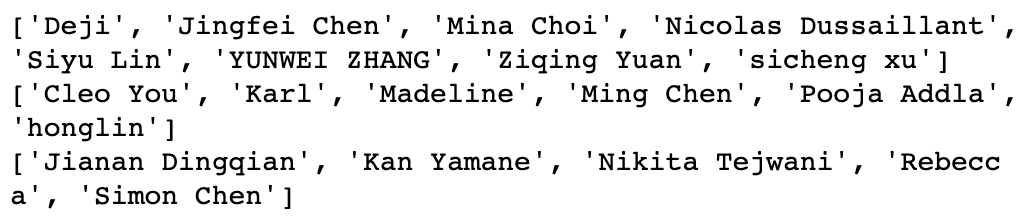

Instead of using <mark>nx.draw()</mark> for quick and dirty networks, other functions plot networks layer by layer for prettier graphs.

The first thing to do is obtain the positions of each node through <mark>spring_layout()</mark>, which is just one option among many. [Here's a list of the ones available in <mark>networkx</mark>](https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout).

Next, plot each community separately for different colors.

Plot the edges as well as the labels of the graph.

Finally, use <mark>plt.show()</mark> to suppress the <mark>networkx</mark> outputs.

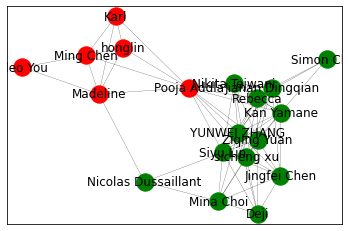

In [18]:
# Set seed (optional)
np.random.seed(123)

# Obtain the positions of the nodes
pos = nx.spring_layout(G)

# Print out all the nodes with color
nx.draw_networkx_nodes(G, pos = pos, nodelist=community_0, node_color='green', label = True)
nx.draw_networkx_nodes(G, pos = pos, nodelist=community_1, node_color='red', label = True)

# Print out the edges
nx.draw_networkx_edges(G, pos = pos, width = 0.2)

# Make sure the label is printed
nx.draw_networkx_labels(G, pos=pos)

# Show the plot so it supress the other networkx outputs
plt.show()

Comments: looks exactly the same as in the instructions, so I'm not sure why my code is only producing 2 communities. The only difference is that those in community_2 are printing green instead of blue

### Make your network prettier
Next, let's play with some network attributes to make our network prettier. Besides coloring and layout, we can also manipulate hte size and transparency of the nodes and edges.

For example, for nodes, we can do a node size by degree, since we already ahve the <mark>degree</mark> variable. Note here, we're multiplying the degree by 50 times so that it's decently large (this is done in a loop). The default size of a <mark>networkx</mark> node is 300, and the degree is processed by <mark>dict()</mark> to make it a real dictionary object

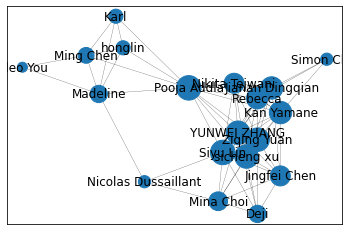

In [19]:
nx.draw_networkx_nodes(G, pos = pos, nodelist = dict(degree).keys(), node_size = [v * 50 for v in dict(degree).values()], label = True)
nx.draw_networkx_edges(G, pos = pos, width = 0.2)
nx.draw_networkx_labels(G, pos=pos)
plt.show()

Similar things can be done with edges. Edge can be changed depending on the weight on it. Since this is a weighted graph, we can obtain the weight of each edge through <mark>get_edge_attributes()</mark>. This is another dictionary object. In addition, we're making the width of the edge as 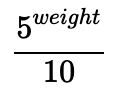, so you can actually see the difference clearly

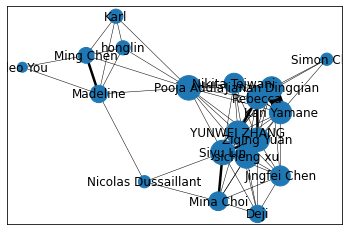

In [20]:
eWeight = nx.get_edge_attributes(G,'weight')

nx.draw_networkx_nodes(G, pos = pos, nodelist = dict(degree).keys(), node_size = [v * 50 for v in dict(degree).values()], label = True)
nx.draw_networkx_edges(G,pos, width = [5**e/10 for e in eWeight.values()])
nx.draw_networkx_labels(G, pos=pos)

plt.show()

And to put it all together:

The tricky thing is to specify each community's color and change the node size at the same time. Therefore, we need to first create three (2) dictionaries corresponding to each community from the degree dictionary. Then pass the information to the node size.

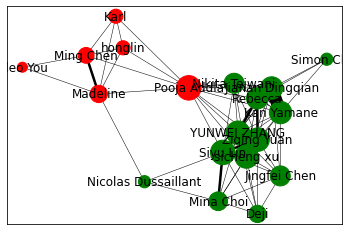

In [21]:
## Adjusted for my earlier error of only 2 communities

# Degrees of each community
community_0_degree = {c: dict(degree)[c] for c in community_0}
community_1_degree = {c: dict(degree)[c] for c in community_1}


# Print out the nodes with color and size
nx.draw_networkx_nodes(G, pos = pos, 
                       nodelist=community_0,
                       node_color='green',
                       node_size = [v * 50 for v in community_0_degree.values()],
                       label = True)

nx.draw_networkx_nodes(G, pos = pos,
                       nodelist=community_1,
                       node_size = [v * 50 for v in community_1_degree.values()],
                       node_color='red', label = True)

# Print out the edges with proper width
nx.draw_networkx_edges(G,pos, width = [5**e/10 for e in eWeight.values()])

# Make sure the label is printed
nx.draw_networkx_labels(G, pos=pos)

# Show the plot so it supress the other networkx outputs
plt.show()

Drawing nice plots is challenging. Software, such as Gephi, automates the process fairly well and makes it easy to obtain the network statistics. 

Some references FMI:
* Gephi Download: https://gephi.org/
* Gephi Tutorial: https://www.youtube.com/watch?v=371n3Ye9vVo
* UCINET download (free trial for 3 months): https://sites.google.com/site/ucinetsoftware/home
* UCINET quick guide: https://depts.washington.edu/sociolab/researchtools/networkanalysis/documents/UCINetQuickGuide2018.pdf
* NodeXL (very good tool for social media analysis and can do lot of things including sentiment analysis): https://www.smrfoundation.org/nodexl/
* NodeXL quick start: https://youtu.be/mjAq8eA7uOM
* A wiki page on SNA tools: https://en.wikipedia.org/wiki/Social_network_analysis_software